<a href="https://colab.research.google.com/github/TahsanX/Banking-System/blob/main/Retail_Store_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 12.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"


--2025-10-15 14:44:01--  https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘Online Retail.xlsx’

Online Retail.xlsx      [        <=>         ]  22.62M  11.6MB/s    in 1.9s    

2025-10-15 14:44:05 (11.6 MB/s) - ‘Online Retail.xlsx’ saved [23715344]



In [ ]:
!unzip Online\ Retail.xlsx

Archive:  Online Retail.xlsx
  inflating: [Content_Types].xml     
  inflating: _rels/.rels             
  inflating: xl/_rels/workbook.xml.rels  
  inflating: xl/workbook.xml         
  inflating: xl/sharedStrings.xml    
  inflating: xl/theme/theme1.xml     
  inflating: xl/styles.xml           
  inflating: xl/worksheets/sheet1.xml  
  inflating: docProps/core.xml       
  inflating: docProps/app.xml        


In [ ]:
df1 = pd.read_excel("Online Retail.xlsx", dtype={'InvoiceNo': 'string', 'StockCode': 'string','Description': 'string', 'Country': 'string'})

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


In [ ]:
df1.shape

(541909, 8)

Data Cleaning:

In [ ]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df1["Description"] = df1.groupby("StockCode")[["Description"]].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else None)

/tmp/ipython-input-1010081869.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df1["Description"] = df1.groupby("StockCode")[["Description"]].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else None)


In [ ]:
df1.dropna(subset="Description",inplace=True)

In [ ]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0


In [ ]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [ ]:
df2 = df1.query(" 0<Quantity<=1500 and UnitPrice>0 ")

In [ ]:
df1 = df2.copy()

In [ ]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530063.000000,530063,530063.000000,397844.000000
mean,10.078811,2011-07-04 20:18:32.100259840,3.907854,15294.416578
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,1500.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,31.504729,NaN,35.917060,1713.146405


**Feature Engineering Part**

In [ ]:
df1["total_income_possible"]=df1["Quantity"]*df1["UnitPrice"]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530063 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   InvoiceNo              530063 non-null  string        
 1   StockCode              530063 non-null  string        
 2   Description            530063 non-null  string        
 3   Quantity               530063 non-null  int64         
 4   InvoiceDate            530063 non-null  datetime64[ns]
 5   UnitPrice              530063 non-null  float64       
 6   CustomerID             397844 non-null  float64       
 7   Country                530063 non-null  string        
 8   total_income_possible  530063 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), string(4)
memory usage: 40.4 MB


In [ ]:
df1["Month"]=df1["InvoiceDate"].dt.month

In [ ]:
df1.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_income_possible,Month
429765,573576,22421,LIPSTICK PEN FUSCHIA,4,2011-10-31 14:09:00,0.83,14096.0,United Kingdom,3.32,10
34736,539422,22654,DELUXE SEWING KIT,3,2010-12-17 14:23:00,5.95,13033.0,United Kingdom,17.85,12
425196,573311,20978,36 PENCILS TUBE SKULLS,2,2011-10-28 16:45:00,1.25,14071.0,United Kingdom,2.50,10
194517,553653,20826,SILVER APERITIF GLASS,12,2011-05-18 11:08:00,0.39,16701.0,United Kingdom,4.68,5
160089,550447,23256,CHILDRENS CUTLERY SPACEBOY,1,2011-04-18 12:36:00,4.15,16033.0,United Kingdom,4.15,4
318019,564820,21417,COCKLE SHELL DISH,1,2011-08-30 12:16:00,4.13,NaN,United Kingdom,4.13,8
389024,570461,23284,DOORMAT KEEP CALM AND COME IN,20,2011-10-10 15:45:00,7.08,14434.0,United Kingdom,141.60,10
343053,566929,22966,GINGERBREAD MAN COOKIE CUTTER,12,2011-09-15 15:21:00,1.25,17428.0,United Kingdom,15.00,9
56416,541104,22214,CANDLE PLATE LACE WHITE,5,2011-01-13 14:29:00,1.63,NaN,United Kingdom,8.15,1
103896,545081,21539,RED RETROSPOT BUTTER DISH,3,2011-02-28 10:35:00,4.95,16057.0,United Kingdom,14.85,2


**EDA and visualization**

In [ ]:
df2 = df1.groupby("Country").size().sort_values(ascending=False)

In [ ]:
df3 = df2.copy().head(8)


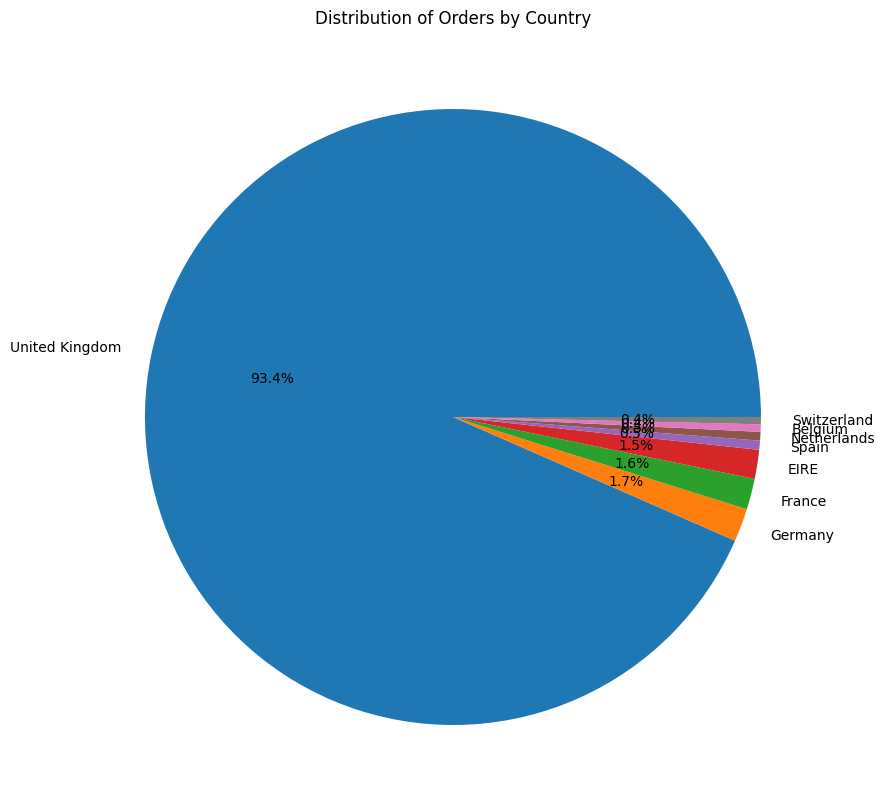

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(df3, labels=df3.index, autopct='%1.1f%%')
plt.title('Distribution of Orders by Country')
plt.show()

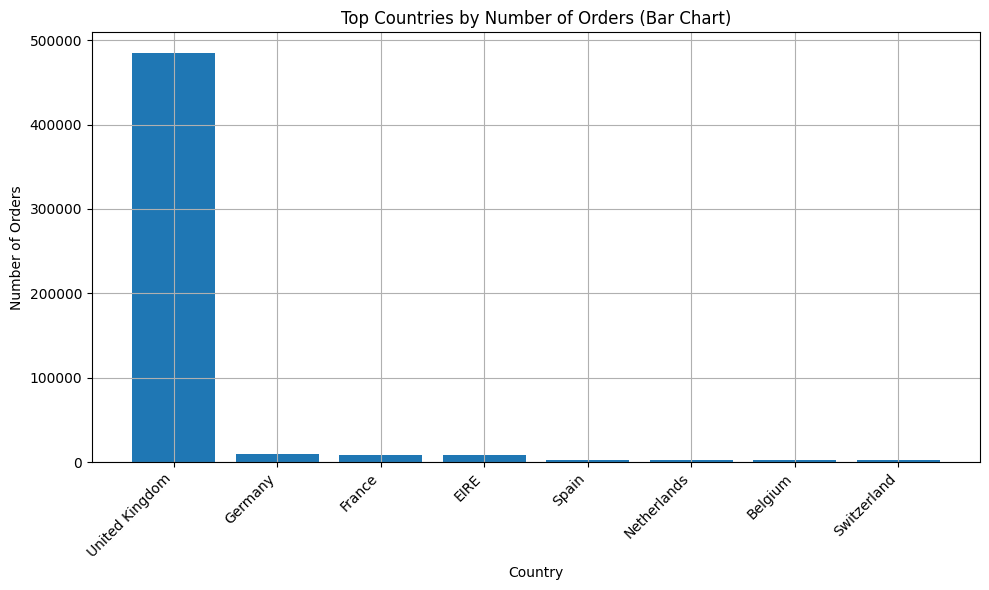

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df3.index, df3.values)
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.title('Top Countries by Number of Orders (Bar Chart)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
df1["Monthlytotal"] = df1.groupby("Month")[["total_income_possible"]].transform("sum")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_income_possible,Month,Monthlytotal
281560,561537,22980,PANTRY SCRUBBING BRUSH,12,2011-07-28 09:58:00,1.65,13870.0,United Kingdom,19.80,7,719030.031
2488,536592,20724,RED RETROSPOT CHARLOTTE BAG,1,2010-12-01 17:06:00,1.66,NaN,United Kingdom,1.66,12,1289997.860
168376,551035,22363,GLASS JAR MARMALADE,6,2011-04-26 11:34:00,2.95,15065.0,United Kingdom,17.70,4,522894.341
56760,541113,21527,RED RETROSPOT TRADITIONAL TEAPOT,2,2011-01-13 15:18:00,7.95,16775.0,United Kingdom,15.90,1,599020.060
95714,544463,21625,VINTAGE UNION JACK APRON,1,2011-02-20 14:31:00,6.95,12988.0,United Kingdom,6.95,2,517484.650
359151,568177,47566,PARTY BUNTING,4,2011-09-25 13:30:00,4.95,13536.0,United Kingdom,19.80,9,1050843.092
541043,581492,22941,CHRISTMAS LIGHTS 10 REINDEER,2,2011-12-09 10:03:00,16.63,NaN,United Kingdom,33.26,12,1289997.860
340338,566624,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,3,2011-09-14 09:36:00,4.95,17315.0,United Kingdom,14.85,9,1050843.092
177897,552188,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-05-06 14:01:00,1.65,12394.0,Belgium,19.80,5,765666.020
97778,544657,22897,OVEN MITT APPLES DESIGN,10,2011-02-22 13:08:00,1.45,14895.0,United Kingdom,14.50,2,517484.650


In [ ]:
df2 = df1.copy()

In [ ]:
df2.drop_duplicates(subset="Month",inplace=True)
df2.sort_values(by="Month",inplace=True)

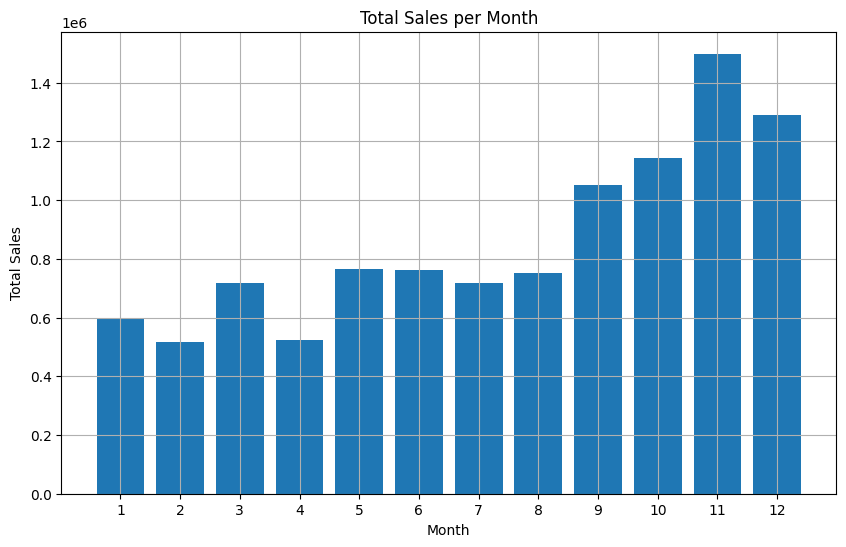

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df2["Month"], df2["Monthlytotal"])
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales per Month")
plt.xticks(df2["Month"])
plt.grid()
plt.show()

**Customer Segmentation**

In [ ]:
rfm = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (df1['InvoiceDate'].max() - x.max()).days,
                                     'InvoiceNo': 'count',
                                     'total_income_possible': 'sum'})
rfm.columns = ['Recency','Frequency','Monetary']

In [ ]:
# Assign quartiles to RFM values
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
# 4 holo highest ar 1 holo lowest
display(rfm.head())

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
CustomerID,,,,,,,
12347.0,1,182,4310.00,4,4,4,444
12348.0,74,31,1797.24,2,2,4,224
12349.0,18,73,1757.55,3,3,4,334
12350.0,309,17,334.40,1,1,2,112
12352.0,35,85,2506.04,3,3,4,334


In [ ]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
12352.0,35,85,2506.04
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


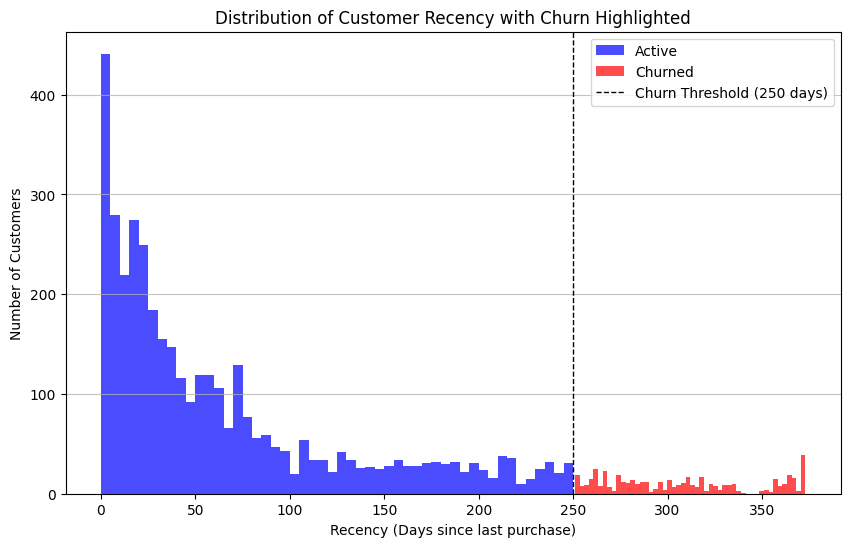

,count
Churned,
Active,3839
Churned,497


In [ ]:
# Define a churn threshold (e.g., more than 250 days since last purchase)
churn_threshold = 250

rfm['Churned'] = rfm['Recency'].apply(lambda x: 'Churned' if x > churn_threshold else 'Active')


plt.figure(figsize=(10, 6))
plt.hist(rfm[rfm['Churned'] == 'Active']['Recency'], bins=50, alpha=0.7, label='Active', color='blue')
plt.hist(rfm[rfm['Churned'] == 'Churned']['Recency'], bins=50, alpha=0.7, label='Churned', color='red')
plt.xlabel("Recency (Days since last purchase)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Recency with Churn Highlighted")
plt.axvline(churn_threshold, color='black', linestyle='dashed', linewidth=1, label=f'Churn Threshold ({churn_threshold} days)')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()


display(rfm['Churned'].value_counts())